# Phylogenetic tree inference using Phylo2Vec

We offer a few minimum examples for phylogenetic optimisation schemes using Phylo2Vec objects, including:
* A hill-climbing scheme using Phylo2Vec vectors, with branch length optimisation using [RAxML-NG](https://github.com/amkozlov/raxml-ng)
* [GradME](https://doi.org/10.1093/gbe/evad213), a continuous optimisation scheme based on a probabilistic version of Phylo2Vec.

## 0. Imports & data

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from ete4 import Tree
from urllib.request import urlretrieve

# To run the notebook here, we need to change the working directory
# to py-phylo2vec, which is the parent directory of the Python package.
os.chdir("../py-phylo2vec")

import phylo2vec as p2v
from phylo2vec.utils.newick import apply_label_mapping

All available optimisation schemes can be found using `list_models`

In [2]:
from phylo2vec.opt import list_methods

list_methods()

['GradME', 'HillClimbing']


As an example, we will look at a simple H3N2 dataset offered with the TreeTime package, available [here](https://github.com/neherlab/treetime_examples/blob/master/data/h3n2_na/h3n2_na_20.fasta).

In [3]:
# Change this if necessary
dataset_dir = "phylo2vec/datasets/data"
fasta_path = f"{dataset_dir}/h3n2_na_20_demo.fa"
urlretrieve(
    "https://raw.githubusercontent.com/neherlab/treetime_examples/79eae7f8025a8ef3165c856c7359d92e738eb893/data/h3n2_na/h3n2_na_20.fasta",
    fasta_path,
)

('phylo2vec/datasets/data/h3n2_na_20_demo.fa',
 <http.client.HTTPMessage at 0x7fce2453b940>)

## 1. Hill-climbing

A hill-climbing scheme for tree optimisation is described in the Phylo2Vec [paper](https://doi.org/10.1093/sysbio/syae030). The general idea is to sample a random index $i$ of the vector, evaluate proposals (in [0, 2*i]), and pick the tree which has the largest change in likelihood compared to our current best. To avoid getting stuck in local optima, we perform random re-rooting operations to change equivalences without changing the likelihood.

The only required argument is `model`, a [substitution model](https://en.wikipedia.org/wiki/Models_of_DNA_evolution) name (as a string).

In [4]:
from phylo2vec.opt import HillClimbing

hc = HillClimbing(model="GTR", verbose=True)

hc_result = hc.fit(fasta_path)

Changing equivalences...
Start step: 4128.975


/home/nclow23/src/phylo2vec/public_fork2/py-phylo2vec/phylo2vec/utils/vector.py:204: FutureWarning: `reorder_v` is deprecated and will be removed in a future version. Use `queue_shuffle` instead.
  warnings.warn(


Loss: 4128.975 (diff: -0.000)
Loss: 4126.375 (diff: -2.600)
Loss: 4126.374 (diff: -0.001)
Loss: 4048.742 (diff: -77.632)
Loss: 4048.742 (diff: -0.000)
Loss: 3974.578 (diff: -74.164)
Loss: 3932.410 (diff: -42.167)
Loss: 3923.969 (diff: -8.441)
Loss: 3919.187 (diff: -4.782)
Loss: 3919.187 (diff: -0.000)
Loss: 3889.435 (diff: -29.752)
Loss: 3887.420 (diff: -2.015)
Loss: 3884.883 (diff: -2.537)
Loss: 3838.813 (diff: -46.070)
Loss: 3758.045 (diff: -80.768)
Loss: 3748.085 (diff: -9.960)
End step: 3748.085
Changing equivalences...
Start step: 3748.085
Loss: 3748.085 (diff: -0.000)
Loss: 3747.398 (diff: -0.687)
Loss: 3745.426 (diff: -1.971)
Loss: 3745.426 (diff: -0.000)
Loss: 3651.994 (diff: -93.433)
Loss: 3650.981 (diff: -1.013)
Loss: 3641.244 (diff: -9.737)
Loss: 3627.691 (diff: -13.552)
Loss: 3604.974 (diff: -22.718)
Loss: 3592.806 (diff: -12.167)
Loss: 3592.806 (diff: -0.000)
End step: 3592.806
Changing equivalences...
Start step: 3592.805
Loss: 3587.610 (diff: -5.195)
Loss: 3576.307 (diff

`hc_result` contains several objects:
 * the best topology
 * a label_mapping to convert the tree back to a Newick with taxon labels
 * the best score (here, the negative log-likelihood of the best tree)
 * all scores obtained during the optimisation

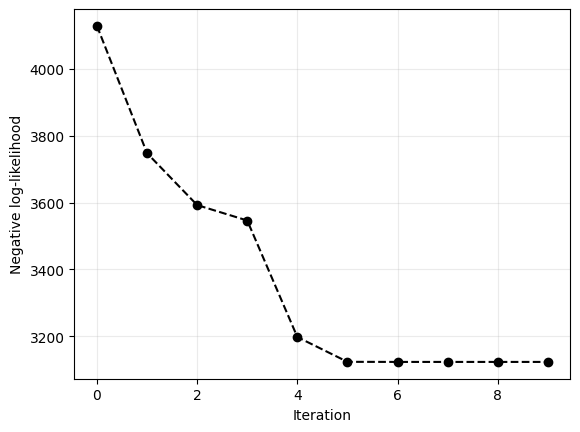

In [5]:
plt.plot(hc_result.scores, "ko--")
plt.xlabel("Iteration")
plt.ylabel("Negative log-likelihood")
plt.grid(alpha=0.25)
plt.show()

In [6]:
hc_newick = p2v.to_newick(hc_result.best)

hc_newick_with_taxa = apply_label_mapping(hc_newick, hc_result.label_mapping)

print(Tree(hc_newick_with_taxa))

   ╭╴A/Denmark/107/2003|EU103941|2003|Denmark||H3N2/1-1409
   │ ╭╴A/Canterbury/58/2000|CY009150|09/05/2000|New_Zealand||H3N2/8-1416
   │ │       ╭╴A/DaNang/DN434/2008|CY104616|11/11/2008|Viet_Nam||H3N2/4-1412
   │ │       │   ╭─┬╴A/Oregon/15/2009|GQ895004|06/25/2009|USA|08_09|H3N2/1-1409
 ╭─┤ │       │   │ ╰╴A/Hong_Kong/H090_695_V10/2009|CY115546|07/10/2009|Hong_Kong||H3N2/8-1416
 │ │ │       │   │     ╭─┬╴A/Nebraska/15/2011|KC892583|12/15/2011|USA|11_12|H3N2/1-1409
 │ │ │     ╭─┤   │     │ ╰╴A/Maryland/21/2011|KC892695|12/26/2011|USA|11_12|H3N2/1-1409
 │ │ │     │ │ ╭─┤   ╭─┤   ╭─┬╴A/Maryland/03/2013|KF789621|02/10/2013|USA|12_13|H3N2/1-1409
 │ ╰─┤     │ │ │ │   │ │ ╭─┤ ╰╴A/New_Hampshire/12/2012|KF790252|11/08/2012|USA|12_13|H3N2/1-1409
 │   │     │ │ │ │ ╭─┤ ╰─┤ ╰─┬╴A/Boston/DOA2_107/2012|CY148382|11/01/2012|USA|12_13|H3N2/1-1409
 │   │   ╭─┤ ╰─┤ │ │ │   │   ╰╴A/Hawaii/02/2013|KF789866|05/28/2013|USA|12_13|H3N2/1-1409
─┤   │   │ │   │ ╰─┤ │   ╰╴A/Indiana/03/2012|KC892731|04/03/2012|U

## 2. GradME

GradME constitutes an attempt to perform continuous phylogenetic inference using gradient descent and balanced minimum evolution (for a review, see [here](https://doi.org/10.1016/j.ejor.2021.08.004)), thus implying that GradME tries to minimise the path length of the tree.

It involves a continuous tree representation based on `ordered` Phylo2Vec trees, with a matrix W of shape ($n-1, n-1$) for a tree of $n$ leaves. For $i \in [0, n-1], j \in [0, n-1], W_{ij} = P(v_i = j)$, where $v$ a Phylo2Vec vector.

Given the Phylo2Vec constraints, $W$ is a lower-triangular, stochastic matrix (row sum to 1). The most likely single tree from W can be obtained by take the column-wise argmax: ```v = W.argmax(1)```.

To improve search, GradME also relies on `Queue Shuffle`, a taxon reordering algorithm to allow for full tree space exploration.

For more details, see the paper: <https://doi.org/10.1093/gbe/evad213>

From an implementation point of view, GradME is based on `jax` and `optax`. It is thus advised to run it on a GPU to experience speed-ups! The only required argument is `model`, a [substitution model](https://en.wikipedia.org/wiki/Models_of_DNA_evolution) name (as a string).

In [4]:
from phylo2vec.opt import GradME

# To run the GradME optimizer, we need to specify a substitution model.
gradme = GradME(model="F81", solver="adabelief", patience=10, learning_rate=0.1, tol=1e-10, verbose=True, nesterov=True)

gradme_result = gradme.fit(fasta_path)

INFO:2025-09-18 13:43:07,998:jax._src.xla_bridge:749: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
[2025-09-18 13:43:07,998] Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
 16%|█▌        | 16/100 [01:08<05:57,  4.26s/it, Current loss: -2.079899]


Early stopping after 10 iterations without improvement.
Optimisation finished in 70.82 seconds with 17 loss evaluations.


`gradme_result` contains several objects:
 * the best topology
 * a label_mapping to convert the tree back to a Newick with taxon labels
 * the best score (here, the negative log-likelihood of the best tree)
 * all scores obtained during the optimisation
 * the best set of weights (`best_W`) corresponding to a probabilistic ordered tree

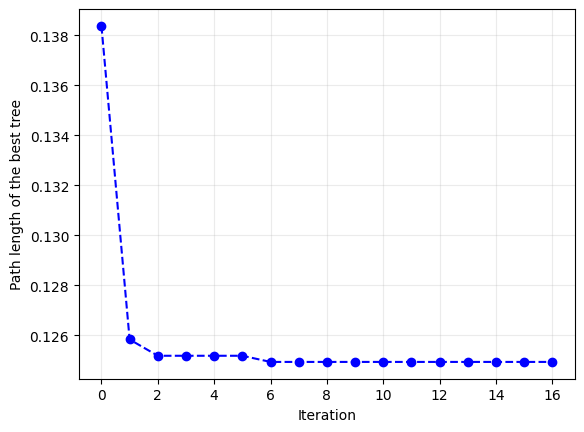

In [5]:
plt.plot(np.exp(gradme_result.scores), "bo--")
plt.xlabel("Iteration")
plt.ylabel("Path length of the best tree")
plt.grid(alpha=0.25)
plt.show()

In [6]:
gradme_newick = p2v.to_newick(np.asarray(gradme_result.best))

gradme_newick_with_taxa = apply_label_mapping(gradme_newick, gradme_result.label_mapping)

print(Tree(gradme_newick_with_taxa))

       ╭╴A/Boston/57/2008|CY044710|02/24/2008|USA|07_08|H3N2/1-1409
     ╭─┤ ╭─┬╴A/Oregon/15/2009|GQ895004|06/25/2009|USA|08_09|H3N2/1-1409
     │ ╰─┤ ╰╴A/Hong_Kong/H090_695_V10/2009|CY115546|07/10/2009|Hong_Kong||H3N2/8-1416
     │   │ ╭╴A/Minab/797/2011|KC865620|12/24/2011|Iran||H3N2/20-1428
     │   ╰─┤ ╭╴A/Peru/PER247/2011|CY162234|08/26/2011|Peru||H3N2/8-1416
     │     ╰─┤ ╭─┬╴A/Maryland/21/2011|KC892695|12/26/2011|USA|11_12|H3N2/1-1409
   ╭─┤       ╰─┤ ╰╴A/Nebraska/15/2011|KC892583|12/15/2011|USA|11_12|H3N2/1-1409
   │ │         │ ╭╴A/Indiana/03/2012|KC892731|04/03/2012|USA|11_12|H3N2/1-1409
   │ │         ╰─┤ ╭╴A/New_Hampshire/12/2012|KF790252|11/08/2012|USA|12_13|H3N2/1-1409
   │ │           ╰─┤ ╭─┬╴A/Boston/DOA2_107/2012|CY148382|11/01/2012|USA|12_13|H3N2/1-1409
 ╭─┤ │             ╰─┤ ╰╴A/Hawaii/02/2013|KF789866|05/28/2013|USA|12_13|H3N2/1-1409
 │ │ │               ╰╴A/Maryland/03/2013|KF789621|02/10/2013|USA|12_13|H3N2/1-1409
 │ │ ╰╴A/DaNang/DN434/2008|CY104616|11/11/2008|Vi

<Axes: >

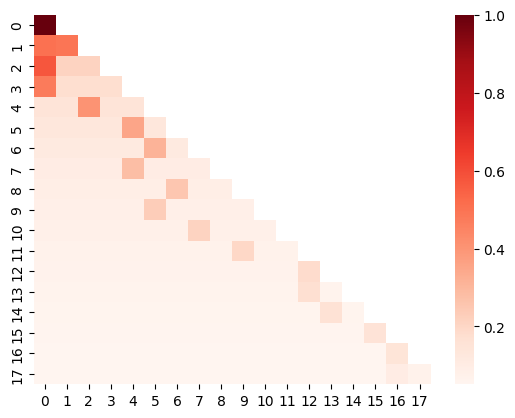

In [7]:
sns.heatmap(
    gradme_result.best_W,
    cmap="Reds",
    mask=np.triu(np.ones_like(gradme_result.best_W, dtype=bool), k=1)
)